## CMF 1
Institut für Musikinformatik und Musikwissenschaft – Wintersemester 2025–26
### Woche 04 – Übungen

### Aufgabe 00.

Überlege dir eine Frage zum Inhalt der Vorlesung, z. B. über einen Punkt, der unklar geblieben ist oder über etwas, worüber du gerne mehr wissen möchtest.  

### Aufgabe 01. Harmonische Analyse und Beschriftung.

Das Modul *music21.roman* erlaubt es, Akkorde im Kontext einer (angegebenen) Tonart zu analysieren und zu beschriften. \
Ziel dieser Aufgabe ist es, eine solche harmonische Analyse unter die Bass-Stimme in eine Partitur einzufügen.

In [1]:
import music21 as m21

1) Reminder aus der Vorlesung zur Funktionsweise des Moduls *music21.roman*.

In [2]:
c_major_key = m21.key.Key('C') # C-Dur-Tonart
f_major_triad = m21.chord.Chord(['F3', 'C4', 'A4']) # F-Dur-Dreiklang 

In [3]:
# Harmonische Analyse des Akkords 'f_major_triad' im Kontext der Tonart 'c_major_key'
label = m21.roman.romanNumeralFromChord(f_major_triad, c_major_key)

In [4]:
# Akkord-Funktion (als "Roman Numeral") über die Methode .figure
print(label.figure)

IV


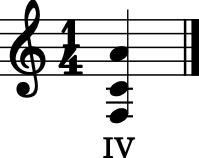

In [5]:
# Beschriftung des Akkords mit der Methode .addLyric()
f_major_triad.addLyric(label.figure)
f_major_triad.show()

2) Lade das erste Stück aus dem music21-Bach-Korpus und bestimme die globale Tonart des Stücks – z. B. mit der Methode *.analyze('key')*

In [6]:
bach_corpus = m21.corpus.search('bach', fileExtensions='xml')
score = bach_corpus[0].parse()

In [7]:
key = score.analyze("key")

3) Speichere alle Noten der Bass-Stimme des Stücks in einer Liste. \
Jede Note sollte **zusammen mit ihrem Offset in Bezug auf den Anfang des Stücks als Tupel** in dieser Liste abgespeichert werden – nach dem Muster [(Note1, Offset1), (Note2, Offset2), ...].

In [8]:
for number, part in enumerate(score.parts):
    print("Part %i is named '%s'." % (number, part.partName))

Part 0 is named 'Horn 2'.
Part 1 is named 'Soprano'.
Part 2 is named 'Alto'.
Part 3 is named 'Tenor'.
Part 4 is named 'Bass'.


In [16]:
# Variable für die Bass-Stimme des Stücks
bass_part = score.parts[4]
print(bass_part.partName)

Bass


In [28]:
# Liste für alle Noten der Bass-Stimme mit ihrem jeweiligen Offset-Wert
bass_notes_list = []

for note in bass_part.flatten().getElementsByClass(m21.note.Note):
    bass_notes_list.append((note, note.offset))

In [29]:
print(bass_notes_list)

[(<music21.note.Note F>, 0.0), (<music21.note.Note E>, 1.0), (<music21.note.Note F>, 2.0), (<music21.note.Note D>, 3.0), (<music21.note.Note A>, 4.0), (<music21.note.Note B->, 5.0), (<music21.note.Note C>, 5.5), (<music21.note.Note D>, 6.0), (<music21.note.Note E>, 6.5), (<music21.note.Note F>, 7.0), (<music21.note.Note F>, 8.0), (<music21.note.Note B->, 9.0), (<music21.note.Note A>, 10.0), (<music21.note.Note G>, 10.5), (<music21.note.Note A>, 11.0), (<music21.note.Note B>, 11.5), (<music21.note.Note C>, 12.0), (<music21.note.Note F>, 13.0), (<music21.note.Note G>, 14.0), (<music21.note.Note C>, 15.0), (<music21.note.Note F>, 16.0), (<music21.note.Note B->, 17.0), (<music21.note.Note C>, 18.0), (<music21.note.Note D>, 19.0), (<music21.note.Note E>, 19.5), (<music21.note.Note F>, 20.0), (<music21.note.Note C>, 21.0), (<music21.note.Note F>, 23.0), (<music21.note.Note F>, 24.0), (<music21.note.Note E>, 25.0), (<music21.note.Note F>, 26.0), (<music21.note.Note D>, 27.0), (<music21.note.N

4) Erstelle mithilfe der Methode *.chordify()* einen Stream, der alle Akkorde des Stücks enthält.


In [41]:
chordified_score = score.chordify()

5) Iteriere über alle Objekte dieses Streams. \
Überprüfe bei jedem Objekt, ob es sich um ein *m21.chord.Chord*-Objekt handelt (oder, anders gesagt, um eine Instanz der Klasse *m21.chord.Chord*). \
Falls ja, speichere **die harmonische Beschriftung des Akkords zusammen mit dem Offset des Akkords als Tupel** in einer Liste ab – nach dem Muster [(Label_Akkord1, Offset_Akkord1), (Label_Akkord2, Offset_Akkord2), ...].

In [52]:
# Liste für alle harmonischen Beschriftungen zusammen mit dem jeweiligen Offset-Wert des Akkords
chord_labels_list = []

for object in chordified_score.flatten():

    if isinstance(object, m21.chord.Chord):
        chord_labels_list.append((m21.roman.romanNumeralFromChord(object).figure, object.offset))

In [53]:
print(chord_labels_list)

[('I', 0.0), ('I6', 1.0), ('I6', 1.5), ('I', 2.0), ('I', 2.5), ('i', 3.0), ('i', 3.5), ('I6', 4.0), ('I6', 4.5), ('I', 5.0), ('I', 5.25), ('I7642', 5.5), ('i7542', 5.75), ('I6', 6.0), ('iø7b53b2', 6.5), ('I', 7.0), ('I', 8.0), ('I', 9.0), ('i65', 9.5), ('I7', 9.75), ('io75b2', 10.0), ('I64b3', 10.5), ('io6', 10.75), ('I6', 11.0), ('I6b5', 11.5), ('I', 12.0), ('I', 12.5), ('i65', 13.0), ('iø7643', 13.5), ('i763', 13.75), ('I', 14.0), ('I', 15.0), ('I', 16.0), ('I', 16.5), ('I', 17.0), ('i65', 17.5), ('i6', 18.0), ('i65', 18.5), ('I65', 19.0), ('I6b5', 19.5), ('I', 20.0), ('I', 20.5), ('i54', 21.0), ('I654', 21.5), ('I654', 21.75), ('Ib753', 22.0), ('Ib753', 22.5), ('Ib753', 22.75), ('I', 23.0), ('I', 24.0), ('I6', 25.0), ('I6', 25.5), ('I', 26.0), ('I', 26.5), ('i', 27.0), ('i', 27.5), ('I6', 28.0), ('I6', 28.5), ('I', 29.0), ('I', 29.25), ('I7642', 29.5), ('i7542', 29.75), ('I6', 30.0), ('iø7b53b2', 30.5), ('I', 31.0), ('I', 32.0), ('I', 33.0), ('i65', 33.5), ('I7', 33.75), ('io75b2', 

6) Python-Reminder: Teste die Funktion der Listen-Methode *.pop(...)*

In [56]:
listTest = [1,2,3,4]
print(listTest, listTest.pop(1), listT)

[1, 3, 4] 2 [1, 3, 4]


7) Überlege dir eine Methode, um jede Beschriftung der Liste *chord_labels_list* mit der Note aus der Liste *bass_notes_list* zu verknüpfen, die den selben Offset-Wert hat.

*Beispiel:* ('V6', 1.0) und (<music21.note.Note E>, 1.0) haben denselben Offset-Wert. Dementsprechend sollte die Note das Label 'V6' bekommen.

*Hinweis:*  Iteriere über die vorhin erstellte Liste mit den Label-Offset-Tupel. \
Nutze die Listen-Methode .pop(0), um auf das jeweils erste Element des Liste mit den Noten-Offse-Tupel zuzugreifen.

In [14]:
for label, offset in chord_labels_list:

    ...

NameError: name 'chord_labels_list' is not defined

8) Visualisiere und überprüfe den aktuellen Stand des gesamten Scores.

In [ ]:
score.show()

### Aufgabe 02. Varianten der Krumhansl-Schmuckler-Methode.

Wie in der Vorlesung gesehen, ist es möglich für die Krumhansl-Schmuckler-Analyse zur Tonarten-Bestimmung verschiedene Pitch-Classes-Profile zu nutzen (siehe Folie 13 der Woche 04).\
Ziel dieser Aufgabe ist es, das vorherige Stück von Bach taktweise zu analysieren und die Auswirkung verschiedener Pitch-Class-Profile zu beobachten.

Hinweis: Siehe die music21-Dokumentation für die Implementierung der verschiedenen Analyse-Methoden: https://www.music21.org/music21docs/moduleReference/moduleAnalysisDiscrete.html

In [7]:
import music21 as m21
from tabulate import tabulate

1) Nutze verschiedene Pitch-Class-Profile um die globale Tonart des ersten Stücks aus dem music21-Bach-Korpus zu bestimmen.

In [55]:
bach_corpus = m21.corpus.search('bach', fileExtensions='xml')
score = bach_corpus[0].parse()

In [ ]:
analysis_method_AardenEssen =  m21.analysis.discrete.AardenEssen()
used_weights_major = analysis_method_AardenEssen.getWeights('major')
used_weights_minor = analysis_method_AardenEssen.getWeights('minor')

F major


In [88]:
print(used_weights_major)

[17.7661, 0.145624, 14.9265, 0.160186, 19.8049, 11.3587, 0.291248, 22.062, 0.145624, 8.15494, 0.232998, 4.95122]


In [89]:
print(used_weights_minor)

[18.2648, 0.737619, 14.0499, 16.8599, 0.702494, 14.4362, 0.702494, 18.6161, 4.56621, 1.93186, 7.37619, 1.75623]


In [92]:
key_AardenEssen = analysis_method_AardenEssen.getSolution(score)
print('Found key for Aarden-Essen weights:', key_AardenEssen)

Found key for Aarden-Essen weights: F major


In [93]:
analysis_method_BellmanBudge =  m21.analysis.discrete.BellmanBudge()
key_BellmanBudge = analysis_method_BellmanBudge.getSolution(score)
print('Found key for Bellman-Budge weights:', key_BellmanBudge)

Found key for Bellman-Budge weights: F major


In [94]:
analysis_method_KrumhanslSchmuckler =  m21.analysis.discrete.KrumhanslSchmuckler()
key_KrumhanslSchmuckler = analysis_method_KrumhanslSchmuckler.getSolution(score)
print('Found key for Krumhansl-Schmuckler weights:', key_KrumhanslSchmuckler)

Found key for Krumhansl-Schmuckler weights: F major


In [ ]:
analysis_method_TemperleyKostkaPayne =  m21.analysis.discrete.TemperleyKostkaPayne()
key_TemperleyKostkaPayne = analysis_method_TemperleyKostkaPayne.getSolution(score)
print('Found key for Tmeperlay-Kostka-Payne weights:' key_TemperleyKostkaPayne)

F major


In [96]:
analysis_method_SimpleWeights =  m21.analysis.discrete.SimpleWeights()
key_SimpleWeights = analysis_method_SimpleWeights.getSolution(score)
print('Found key for "simple" weights:', key_SimpleWeights)

Found key for "simple" weights: F major


In [97]:
print(tabulate([[key_AardenEssen, key_BellmanBudge, key_KrumhanslSchmuckler, key_TemperleyKostkaPayne, key_SimpleWeights]],
               headers=['Aarden-Essen', 'Bellman-Budge', 'Krumhansl-Schmuckler', 'Temperley-Kostka-Payne', 'Simple Weights']))

Aarden-Essen    Bellman-Budge    Krumhansl-Schmuckler    Temperley-Kostka-Payne    Simple Weights
--------------  ---------------  ----------------------  ------------------------  ----------------
F major         F major          F major                 F major                   F major


2) Bestimme die Tonart für alle einzelnen Takte und vergleiche die Ergebnisse der verschiedenen Analyse-Methoden.

In [101]:
number_first_measure = score.parts[0].measure(0).number
number_last_measure = score.parts[0].measure(-1).number

In [102]:
print(number_first_measure)
print(number_last_measure)

0
20


In [18]:
...
  

Ellipsis